# Getting Started

The top of Python files should always be a short documentation about the
content of the file, or "docstring".

This ipyton notebook is short demonstration of Python for scientific data analysis

This script covers the following points:

* Plotting a sine wave
* Generating a column matrix of data
* Writing data to a text-file, and reading data from a text-file
* Waiting for a button-press to continue the program exectution
* Using a dictionary, which is similar to MATLAB structures
* Extracting data which fulfill a certain condition
* Calculating the best-fit-line to noisy data
* Formatting text-output
* Waiting for a keyboard-press
* Calculating confidence intervals for line-fits
* Saving figures

For such a short program, the definition of a "main" function, and calling
it by default when the module is imported by the main program, is a bit
superfluous. But it shows good Python coding style.

Author: Thomas Haslwanter, Feb-2017

***np.zeros*** : generates zeros. Note that it takes only one(!) input. If you want to generate a matrix of zeroes, this input has to be a tuple, containing the number of rows/columns!

(Page 20). 

In [2]:
import numpy as np

In [3]:
np.zeros(3)

array([0., 0., 0.])

In [4]:
np.zeros((2,3))

array([[0., 0., 0.],
       [0., 0., 0.]])

***np.ones*** generates ones.<br> 
***np.random.randn*** generates normally distributed numbers, with a mean of 0 and a standard deviation of 1. <br>
***np.arange*** generates a range of numbers. Parameters can be start, end, steppingInterval. Note that the end-value is excluded! While this can sometimes be a bit awkward, it has the advantage that consecutive sequences can be easily generated, without any overlap, and without missing any data points:

(Page 20). 

In [5]:
np.arange(3)

array([0, 1, 2])

In [6]:
np.arange(1,3,0.5)

array([1. , 1.5, 2. , 2.5])

***np.linspace*** generates linearly spaced numbers.

(Page 20). 

In [7]:
np.linspace(0, 10,6)

array([ 0.,  2.,  4.,  6.,  8., 10.])

***np.array*** generates a numpy array from given numerical data.

(Page 21). 

In [9]:
np.array([[1,2], [3,4]])

array([[1, 2],
       [3, 4]])

There are a few points that are peculiar to Python, and that are worth noting: 
-  Matrices are simply “lists of lists”. Therefore the first element of a matrix gives you the first row:
- A vector is not the same as a one-dimensional matrix! This is one of the few really un-intuitive features of Python, and can lead to mistakes that are hard to find. For example, vectors cannot be transposed, but matrices can.


In [13]:
Amat = np.array([[1,2],[3,4]])
Amat

array([[1, 2],
       [3, 4]])

In [16]:
Amat[0]

array([1, 2])

In [17]:
x    = np.arange(3)
Amat = np.array([[1, 2], [3, 4]])

In [22]:
x.T

array([0, 1, 2])

## 2.5 Pandas: Data Structures for Statistics pandas is a widely used Python package which has been


### 2.5.1 Data Handling 

a) Common Procedures


In [26]:
import numpy as np
import pandas as pd

In [31]:
pd.options.display.max_rows=10

In [27]:
t = np.arange(0, 10, 0.1)
x = np.sin(t)
y = np.cos(t)

In [28]:
df = pd.DataFrame({'Time':t, 'x':x, 'y':y})

In [32]:
df

,Time,x,y
0,0.0,0.000000,1.000000
1,0.1,0.099833,0.995004
2,0.2,0.198669,0.980067
3,0.3,0.295520,0.955336
4,0.4,0.389418,0.921061
...,...,...,...
95,9.5,-0.075151,-0.997172
96,9.6,-0.174327,-0.984688
97,9.7,-0.271761,-0.962365
98,9.8,-0.366479,-0.930426


In [37]:
data = df[['Time', 'y']]
data

,Time,y
0,0.0,1.000000
1,0.1,0.995004
2,0.2,0.980067
3,0.3,0.955336
4,0.4,0.921061
...,...,...
95,9.5,-0.997172
96,9.6,-0.984688
97,9.7,-0.962365
98,9.8,-0.930426


In [40]:
df[['Time', 'y']][4:10]

,Time,y
4,0.4,0.921061
5,0.5,0.877583
6,0.6,0.825336
7,0.7,0.764842
8,0.8,0.696707
9,0.9,0.621610


In [43]:
df.iloc[4:10, [0,2]]

,Time,y
4,0.4,0.921061
5,0.5,0.877583
6,0.6,0.825336
7,0.7,0.764842
8,0.8,0.696707
9,0.9,0.621610


In [50]:
df.iloc[0:5]

,x,y
Time,,
0.0,0.000000,1.000000
0.1,0.099833,0.995004
0.2,0.198669,0.980067
0.3,0.295520,0.955336
0.4,0.389418,0.921061


### 2.5.2 Grouping


In [52]:
import matplotlib.pyplot as plt


In [53]:
data = pd.DataFrame({ 'Gender': ['f', 'f', 'm', 'f', 'm', 'm', 'f', 'm', 'f', 'm', 'm'], 'TV': [3.4, 3.5, 2.6, 4.7, 4.1, 4.1, 5.1, 3.9, 3.7, 2.1, 4.3] })
data

,Gender,TV
0,f,3.4
1,f,3.5
2,m,2.6
3,f,4.7
4,m,4.1
...,...,...
6,f,5.1
7,m,3.9
8,f,3.7
9,m,2.1


In [58]:
grouped = data.groupby('Gender')
grouped.describe()

TV                                               
       count      mean       std  min    25%  50%  75%  max
Gender                                                     
f        5.0  4.080000  0.769415  3.4  3.500  3.7  4.7  5.1
m        6.0  3.516667  0.926103  2.1  2.925  4.0  4.1  4.3

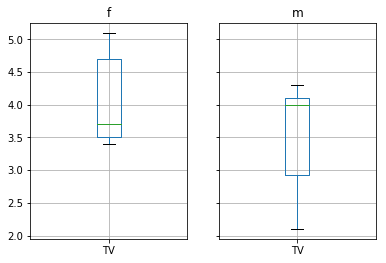

In [62]:
grouped.boxplot()
plt.show()

In [63]:
df_female = grouped.get_group('f')
df_female

,TV
0,3.4
1,3.5
3,4.7
6,5.1
8,3.7


In [65]:
values_female = grouped.get_group('f').values
values_female

array([[3.4],
       [3.5],
       [4.7],
       [5.1],
       [3.7]])

### 2.6 Statsmodels: Tools for Statistical Modeling


statsmodels is a Python package contributed to the community by the statsmodels development team (http://www.statsmodels.org/). It has a very active user community, and has in the last five years massively increased the functionality of Python for statistical data analysis. statsmodels provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests and statistical data exploration. An extensive list of result statistics are available for each estimator. 

statsmodels also allows the formulation of models with the popular formula language based on the notation introduced by Wilkinson and Rogers (1973), and also used by S and R. For example, the following example would fit a model that assumes a linear relationship between x and y to a given dataset:

(Page 39). 

In [77]:
import statsmodels.formula.api as smp

C:\Users\idsoo\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [68]:
x  = np.arange(100)
y  = 0.5 * x - 20 + np.random.randn(len(x))

df = pd.DataFrame({'x':x, 'y':y})

In [80]:
# Fit a linear model, using the "formula" language 
# added by the package "patsy"
model = smp.ols('y~x', data=df).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 2.837e+04
Date:                Tue, 22 May 2018   Prob (F-statistic):          1.64e-122
Time:                        05:32:56   Log-Likelihood:                -126.55
No. Observations:                 100   AIC:                             257.1
Df Residuals:                      98   BIC:                             262.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -20.3966      0.172   -118.581      0.0

Another example would be a model that assumes that “success” is determined by intelligence” and “diligence,” as well as the interaction of the two. Such a model could be described by 

$$success \sim intelligence \times diligence$$
    
More information on that topic is presented in Chap. 11 (“Statistical Models”).<br> An extensive list of result statistics are available for each estimator. The results of all statsmodels commands have been tested against existing statistical packages to ensure that they are correct. Features include: 

- Linear Regression 
- Generalized Linear Models 
- Generalized Estimating Equations 
- Robust Linear Models 
- Linear Mixed Effects Models 
- Regression with Discrete Dependent Variables 
- ANOVA 
- Time Series analysis 
- Models for Survival and Duration Analysis 
- Statistics (e.g., Multiple Tests, Sample Size Calculations, etc.) 
- Nonparametric Methods 
- Generalized Method of Moments 
- Empirical Likelihood 
- Graphics functions 
- A Datasets Package

(Page 40). 

## 2.7 Seaborn: Data Visualization


In [81]:
import seaborn as sns

In [82]:
x = np.linspace(1, 7, 50)
y = 3 + 2*x + 1.5*np.random.randn(len(x))

df = pd.DataFrame({'xData':x, 'yData':y})

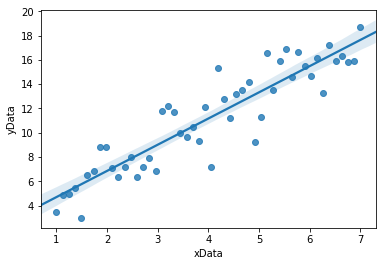

In [84]:
sns.regplot('xData', 'yData', df)

plt.show()

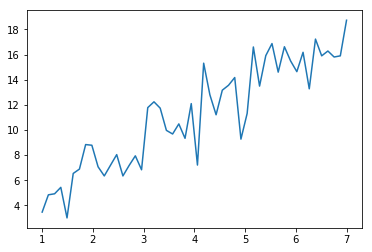

In [88]:
plt.plot(df.xData, df.yData)

# Modules and Packages

In [23]:
# To see the plots inline, even if you have not started the notebook 
# via "ipython notebook --pylab=inline"
% pylab inline

# Note: single comment lines are indicated by "#".

Populating the interactive namespace from numpy and matplotlib


In contrast to MATLAB, you explicitly have to load the modules that you need.
And don't worry here about not knowing the right modules: *numpy*, *scipy*, and
*matplotlib.pyplot* are almost everything you will need most of the time, and you
will quickly get used to those.

*pylab* automatically imports the most important components from numpy and
matplotlib into the current workspace.

# Sine Wave

In [24]:
# Create a sine-wave
t = arange(0,10,0.1)
x = sin(t)

# "arange" and "sin" are from the package "numpy". But since the command
# "pylab" already loaded "numpy" into the current workspace, they are known
# here.

# Next, save the data in a text-file, in column form.
# The formatting is a bit clumsy: data are by default row variables; so to
# get a matrix, you stack the two rows above each other, and then transpose
# the matrix.
outFile = 'test.txt'
savetxt(outFile, vstack([t,x]).T)

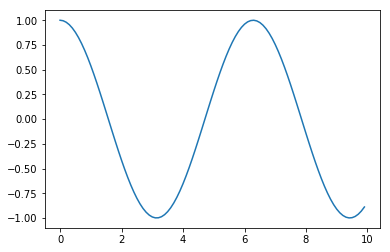

In [25]:
# Read the data into a different variable
inData = loadtxt(outFile)
t2 = inData[:,0] # Note that Python starts at "0"!
x2 = inData[:,1]

# Note: Python used (...) for function arguments, and [...] for indexing.

# Plot the data
plot(t,cos(t))

# Rotating a Vector

When working with vectors and matrices, keep the following things in mind
* By default, data are vectors.
* Use *array* when you want to generate matrices.

# Noisy Data and Linefits

Fit the following function: $y = k*x + d$

In [18]:
# Generate a noisy line
t = arange(-100,100)

# use a Python "dictionary" for named variables
par = {'offset':100, 'slope':0.5, 'noiseAmp':4}
x = par['offset'] + par['slope']*t + par['noiseAmp']*randn(len(t))

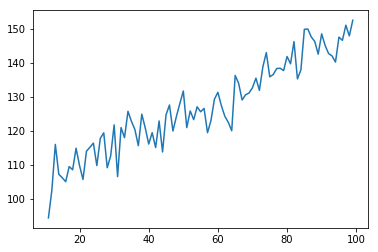

In [19]:
# Boolean indexing works in Python: select "late" values, i.e. with t>10
xHigh = x[t>10]
tHigh = t[t>10]

# Plot the "late" data
plot(tHigh, xHigh)

In [20]:
# Boolean indices can be combined:
x = arange(10)
topRange = x>2
bottomRange = x<8
x[topRange & bottomRange]

array([3, 4, 5, 6, 7])

   ## Fitting a line to the data

In [21]:
# Determine the best-fit line
# To do so, you have to generate a so-called Design Matrix, with "time" in the first
# column, and a column of "1" in the second column:
xMat = vstack((tHigh, ones(len(tHigh)))).T
slope, intercept = linalg.lstsq(xMat, xHigh)[0]

Fit line: intercept = 100.251, and slope = 0.488


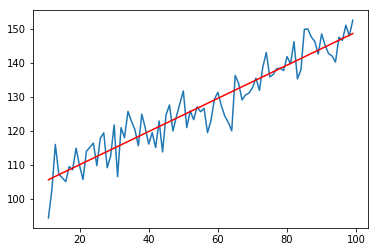

In [22]:
# Show and plot the fit, and save it to a PNG-file with a medium resolution.
# The "modern" way of Python-formatting is used
plot(tHigh, xHigh)
plot(tHigh, intercept + slope*tHigh, 'r')
savefig('linefit.png', dpi=200)
print('Fit line: intercept = {0:5.3f}, and slope = {1:5.3f}'.format(intercept, slope))

# Pandas

In [23]:
# If you want to know confidence intervals, best switch to *pandas*
# Pandas is mainly used for statistics and worksheet-like data
import pandas

# The calculation of OLS has been moved to *statsmodels* now
import statsmodels.formula.api as smf

# Note that this is an advanced topic, and requires new data structures
# such ad "DataFrames" and "ordinary-least-squares" or "ols-models".
myDict = {'x':tHigh, 'y':xHigh}
df = pandas.DataFrame(myDict)
model = smf.ols('y~x', df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     671.9
Date:                Sat, 04 Feb 2017   Prob (F-statistic):           1.09e-42
Time:                        14:27:52   Log-Likelihood:                -260.40
No. Observations:                  89   AIC:                             524.8
Df Residuals:                      87   BIC:                             529.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    100.2512      1.143     87.697      0.0

# More Python Info on the Web

[http://scipy-lectures.github.com/](http://scipy-lectures.github.com/) Python Scientifc Lecture Notes. **If you read nothing else, read this!**

[http://wiki.scipy.org/NumPy_for_Matlab_Users/](http://wiki.scipy.org/NumPy_for_Matlab_Users/) Start here if you have lots of Matlab experience.

[https://docs.python.org/3.6/tutorial/](https://docs.python.org/3.6/tutorial/) The Python tutorial. The original introduction.

[http://jrjohansson.github.com/](http://jrjohansson.github.com/) Lectures on scientic computing with Python. Great ipython notebooks!